In [1]:
import torch
from utils import (
    make_cifar, make_celeb_a, DeviceAwareDataLoader, cycle
)
from PIL import Image
import numpy as np
import torchvision

/scratch/u1319464/miniforge3/envs/vdm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torchvision.__version__

'0.20.1+cu124'

In [3]:
a = make_celeb_a(train=True, download=True)

Files already downloaded and verified


In [4]:
ds = cycle(DeviceAwareDataLoader(a, batch_size=10, shuffle=False, device=torch.device('cpu')))

In [5]:
b = next(ds)

In [13]:
b[0][:,4].shape

torch.Size([10, 44, 54])

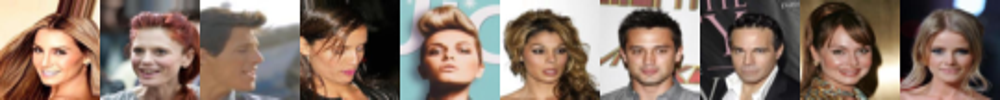

In [10]:
Image.fromarray(
    np.clip(
        np.concatenate(b[0][:,:3].numpy().transpose([0, 2, 3, 1]), axis=1) * 255,
        0,
        255
    ).astype(np.uint8)
).resize([1000, 100])

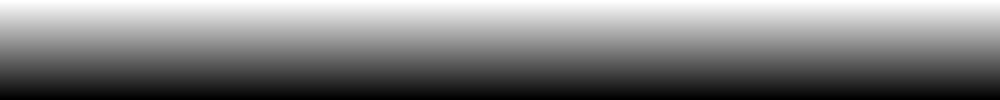

In [19]:
Image.fromarray(
    np.clip(
        np.concatenate(b[0][:,5].numpy(), axis=1) * 255,
        0,
        255
    ).astype(np.uint8)
).resize([1000, 100])

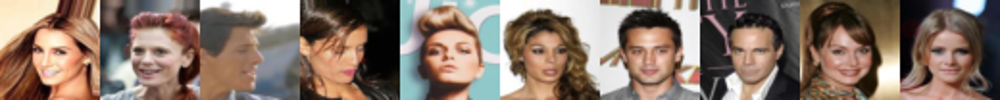

In [8]:
Image.fromarray(
    np.clip(
        np.concatenate(b[0].numpy().transpose([0, 2, 3, 1]), axis=1) * 255,
        0,
        255
    ).astype(np.uint8)
).resize([1000, 100])

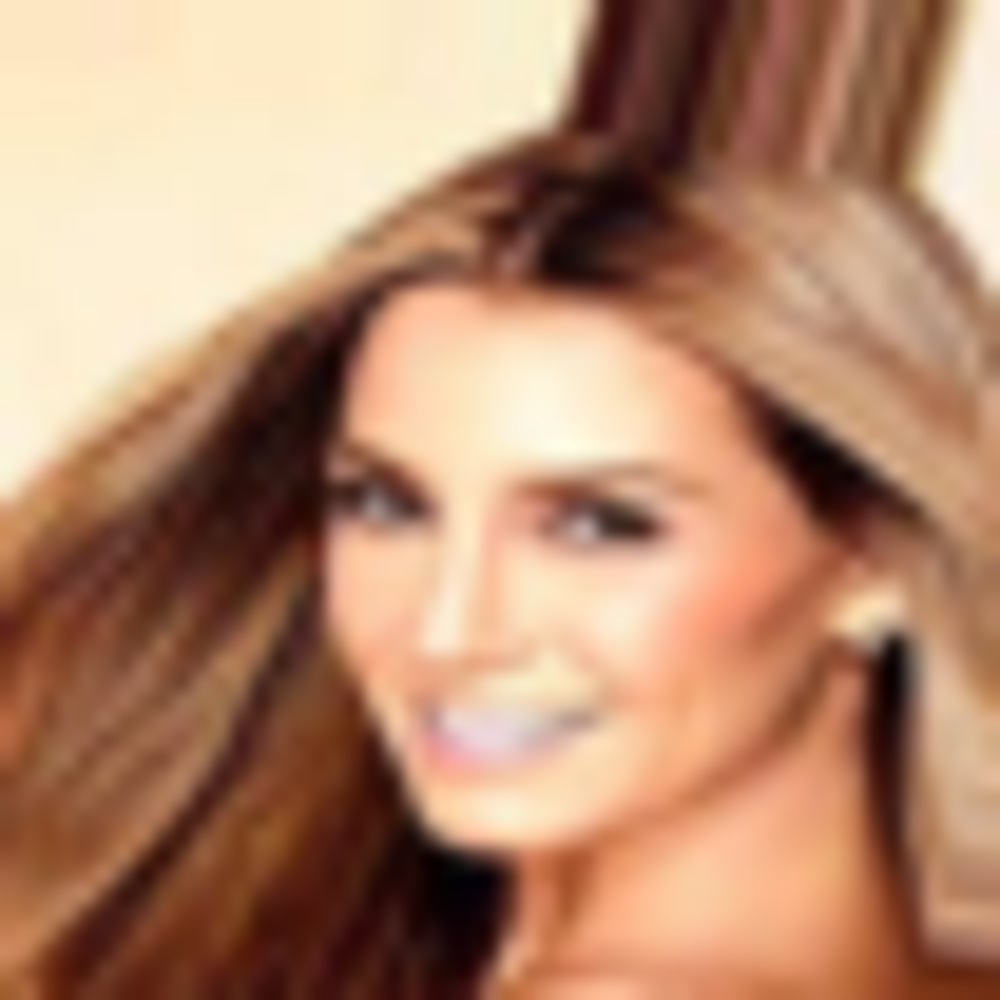

In [6]:
Image.fromarray(
    np.clip(
        b[0].numpy().transpose([0, 2, 3, 1])[0] * 255,
        0,
        255
    ).astype(np.uint8)
).resize([1000,1000])

In [7]:
b[0].numpy().shape

(10, 3, 52, 52)